In [2]:
import numpy as np
import pandas as pd
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
#matplotlib.rc_file("../../templates/matplotlibrc")
import matplotlib.pyplot as plt
matplotlib.rc('text', usetex=True)

In [3]:
from astropy.utils.data import download_file


In [4]:
from astropy.io import fits


In [5]:
image_file2= "nuclei_full_56_ex2"
image_file3= "nuclei_full_56_ex3"
image_file4= "nuclei_full_56_ex4"
image_file5= "nuclei_full_56_ex5"

In [6]:
hdu_list2 = fits.open(image_file2)
hdu_list2.info()
hdu_list3 = fits.open(image_file3)
hdu_list3.info()
hdu_list4 = fits.open(image_file4)
hdu_list4.info()
hdu_list5 = fits.open(image_file5)
hdu_list5.info()

Filename: nuclei_full_56_ex2
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     491   (32, 29, 41, 24, 94)   float32   
Filename: nuclei_full_56_ex3
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     491   (32, 29, 61, 24, 94)   float32   
Filename: nuclei_full_56_ex4
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     491   (32, 29, 81, 24, 94)   float32   
Filename: nuclei_full_56_ex5
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     491   (32, 29, 101, 24, 94)   float32   


In [7]:
hdr=hdu_list3[0].header
hdr

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    5 / number of data axes                            
NAXIS1  =                   32 / length of data axis 1                          
NAXIS2  =                   29 / length of data axis 2                          
NAXIS3  =                   61 / length of data axis 3                          
NAXIS4  =                   24 / length of data axis 4                          
NAXIS5  =                   94 / length of data axis 5                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
CRVAL1  =                 -14. / Start of axis 1                                
CRVAL2  =                 -1

In [8]:
len(list(hdr.keys()))

491

In [9]:
image_data2 = hdu_list2[0].data

In [10]:
print(type(image_data2))
print(image_data2.shape)

<class 'numpy.ndarray'>
(94, 24, 41, 29, 32)


In [11]:
hdu_list2.close()
hdu_list3.close()
hdu_list4.close()
hdu_list5.close()

In [12]:
image_data2 = fits.getdata(image_file2)
image_data3 = fits.getdata(image_file3)
image_data4 = fits.getdata(image_file4)
image_data5 = fits.getdata(image_file5)
print(type(image_data2))
print(image_data2.shape)
print(type(image_data3))
print(image_data3.shape)
print(type(image_data4))
print(image_data4.shape)
print(type(image_data5))
print(image_data5.shape)
# should then be [element,energy, z, y, x]

<class 'numpy.ndarray'>
(94, 24, 41, 29, 32)
<class 'numpy.ndarray'>
(94, 24, 61, 29, 32)
<class 'numpy.ndarray'>
(94, 24, 81, 29, 32)
<class 'numpy.ndarray'>
(94, 24, 101, 29, 32)


In [13]:
len(image_data4[:,0,0,0,0]) #access all elements at the zeroth energy scale, zmin, ymin, and xmin [element,energy,z, y,x]

94

In [14]:
#log10(E/MeV) = CRVAL3 + k * CDELT3 need to add in 100 GeV to this energy passed here since I am dumb
#flux (MeV/nucleon)2 cm−2sr−1s−1(MeV/nucleon)−1
# flux becomes MeV/nucleon /cm**2 /sr /s 
def undo_log_energy(energy):
    i=0
    while i<len(energy):
        energy[i]=10**(energy[i]+2)
        i+=1

In [15]:
energy=np.arange(0,7,0.304347391792257)
undo_log_energy(energy)

In [16]:
#these are at the position of earth we expect.
x_loc=24
y_loc=22
z_loc=40 #40th for the highest halo size of 4, 30th for halo size of 3
be_10_be_9_2=np.divide(image_data2[16,:,20,y_loc,x_loc],image_data2[15,:,20,y_loc,x_loc])
be_10_be_9_3=np.divide(image_data3[16,:,30,y_loc,x_loc],image_data3[15,:,30,y_loc,x_loc])
be_10_be_9_4=np.divide(image_data4[16,:,40,y_loc,x_loc],image_data4[15,:,40,y_loc,x_loc])
be_10_be_9_5=np.divide(image_data5[16,:,50,y_loc,x_loc],image_data5[15,:,50,y_loc,x_loc])


In [17]:
#make helium 3-4 ratio at earth
he_3_4_2=np.divide(image_data2[10,:,20,y_loc,x_loc],image_data2[11,:,20,y_loc,x_loc])
he_3_4_3=np.divide(image_data3[10,:,30,y_loc,x_loc],image_data3[11,:,30,y_loc,x_loc])
he_3_4_4=np.divide(image_data4[10,:,40,y_loc,x_loc],image_data4[11,:,40,y_loc,x_loc])
he_3_4_5=np.divide(image_data5[10,:,50,y_loc,x_loc],image_data5[11,:,50,y_loc,x_loc])

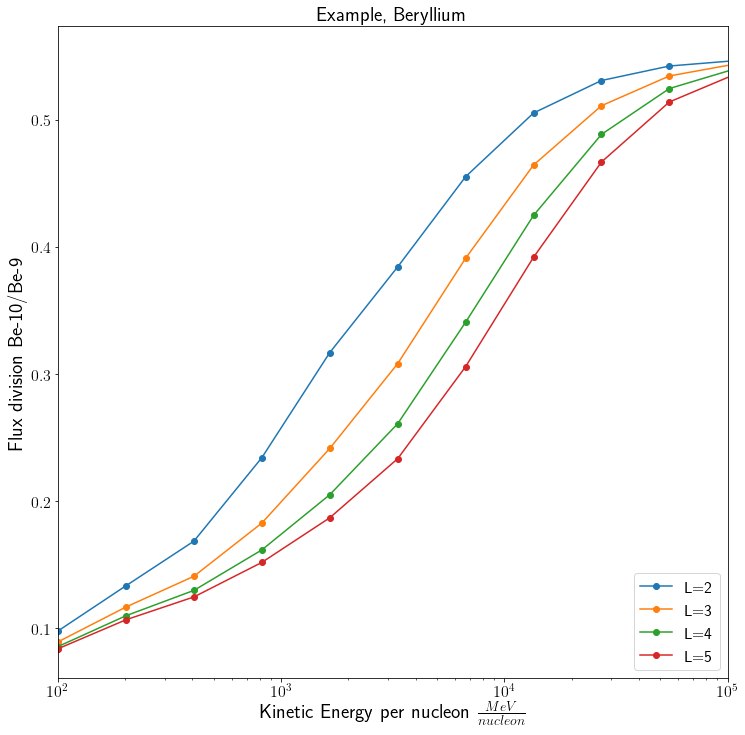

In [18]:
fnt=20
x1=10**2
x2=10**5
plt.figure(figsize=(12,12))
plt.plot(energy,be_10_be_9_2,'-o',label="L=2")
plt.plot(energy,be_10_be_9_3,'-o',label="L=3")
plt.plot(energy,be_10_be_9_4,'-o',label="L=4")
plt.plot(energy,be_10_be_9_5,'-o',label="L=5")
plt.xscale("log")
plt.xlabel("Kinetic Energy per nucleon "r'$\frac{MeV}{nucleon}$',fontsize=fnt)
plt.xticks(fontsize=fnt-4)
#plt.yscale("log")
plt.ylabel("Flux division Be-10/Be-9",fontsize=fnt)
plt.yticks(fontsize=fnt-4)
plt.xlim([x1,x2])
plt.legend(loc='lower right', fontsize=fnt-4)
plt.title("Example, Beryllium", fontsize=fnt)
plt.savefig("be_ratio_multiple.png")
plt.show()

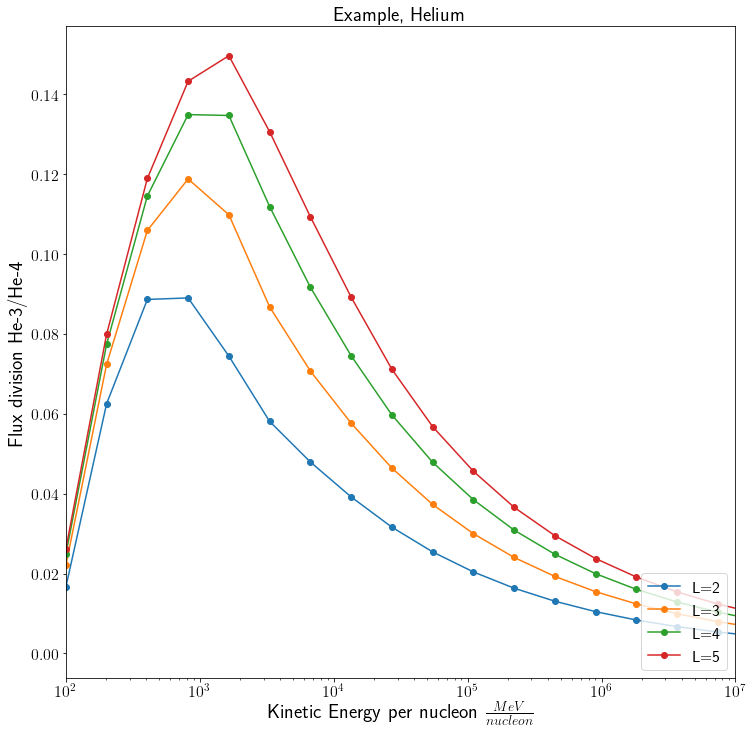

In [19]:
fnt=20
x1=10**2
x2=10**7
plt.figure(figsize=(12,12))
plt.plot(energy,he_3_4_2,'-o',label="L=2")
plt.plot(energy,he_3_4_3,'-o',label="L=3")
plt.plot(energy,he_3_4_4,'-o',label="L=4")
plt.plot(energy,he_3_4_5,'-o',label="L=5")
plt.xscale("log")
plt.xlabel("Kinetic Energy per nucleon "r'$\frac{MeV}{nucleon}$',fontsize=fnt)
plt.xticks(fontsize=fnt-4)
#plt.yscale("log")
plt.ylabel("Flux division He-3/He-4",fontsize=fnt)
plt.yticks(fontsize=fnt-4)
plt.xlim([x1,x2])
plt.legend(loc='lower right', fontsize=fnt-4)
plt.title("Example, Helium", fontsize=fnt)
plt.savefig("He_ratio_multiple.png")
plt.show()

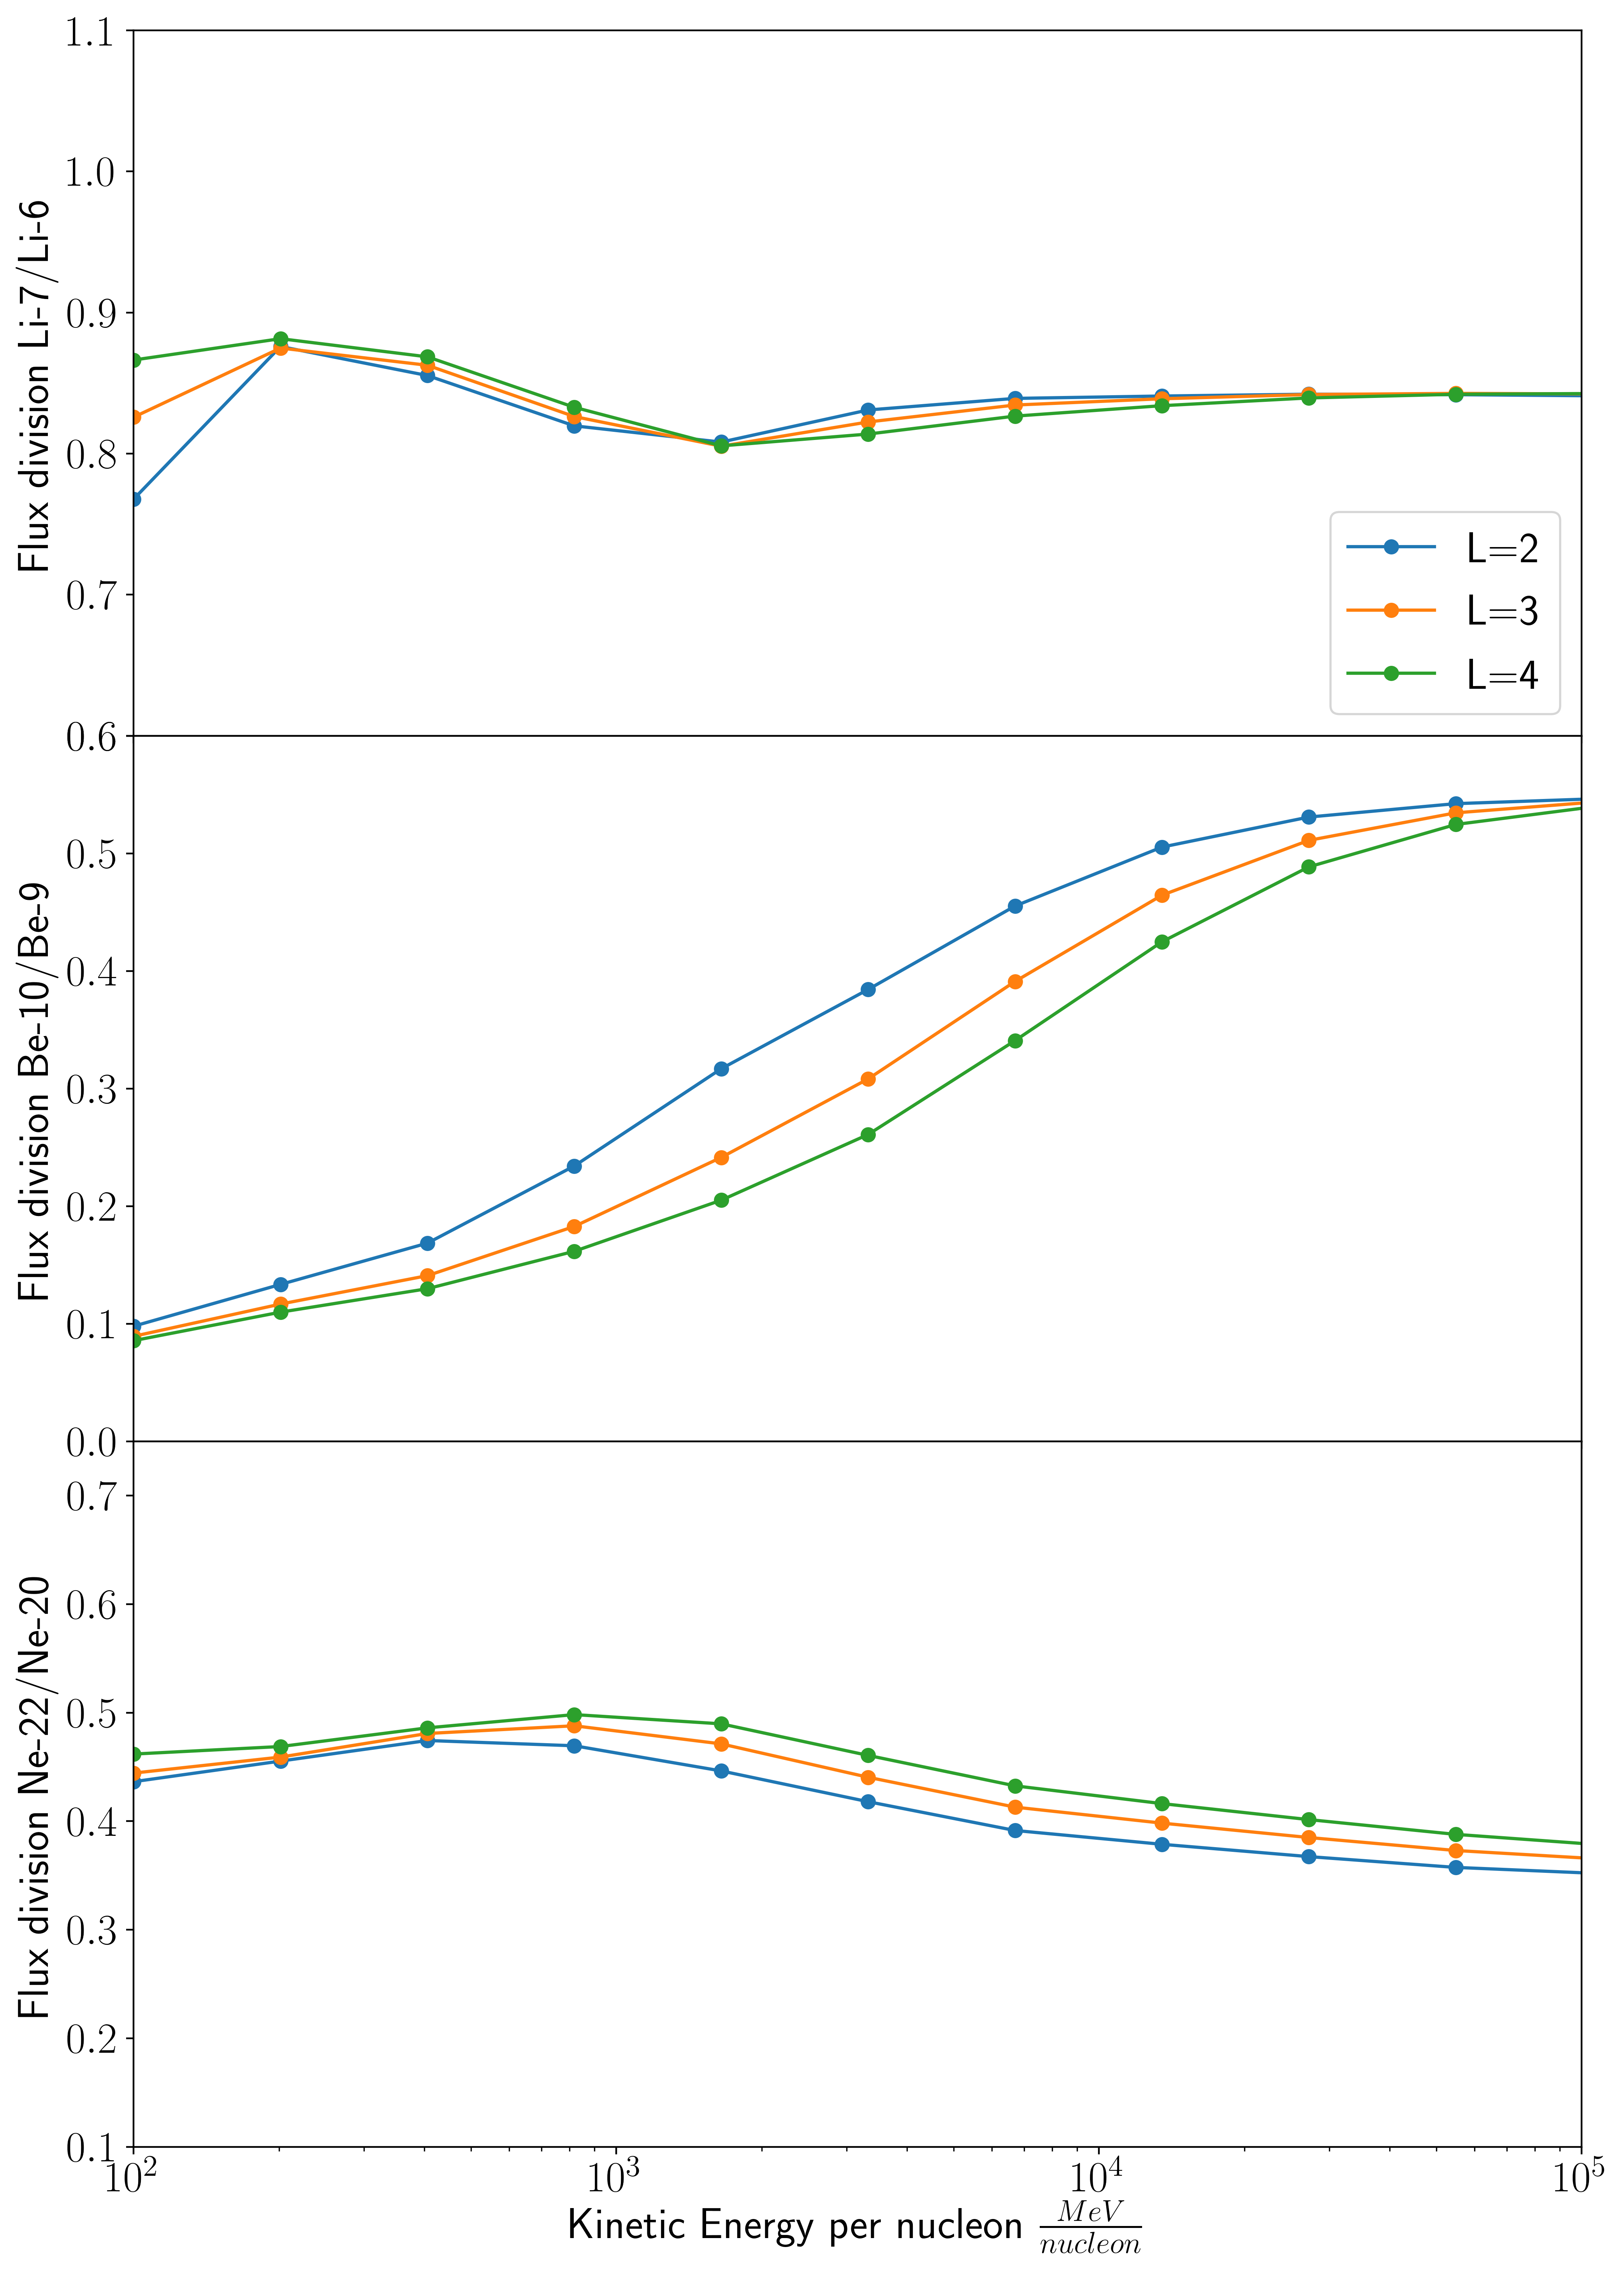

In [17]:
#make more isotope ratios here, store as arrays?
Li_7_Li_6_2=np.divide(image_data2[13,:,20,y_loc,x_loc],image_data2[12,:,20,y_loc,x_loc])
Li_7_Li_6_3=np.divide(image_data3[13,:,20,y_loc,x_loc],image_data3[12,:,20,y_loc,x_loc])
Li_7_Li_6_4=np.divide(image_data4[13,:,20,y_loc,x_loc],image_data4[12,:,20,y_loc,x_loc])
Ne_22_Ne_20_2=np.divide(image_data2[29,:,20,y_loc,x_loc],image_data2[27,:,20,y_loc,x_loc])
Ne_22_Ne_20_3=np.divide(image_data3[29,:,20,y_loc,x_loc],image_data3[27,:,20,y_loc,x_loc])
Ne_22_Ne_20_4=np.divide(image_data4[29,:,20,y_loc,x_loc],image_data4[27,:,20,y_loc,x_loc])

fnt=20
y1=0.6
y2=1.1
x1=10**2
x2=10**5
fig,ax=plt.subplots(figsize=(12, 18), dpi=400, nrows=3,sharex=True)
fig.subplots_adjust(hspace=0)
ax[0].plot(energy,Li_7_Li_6_2,'-o',label="L=2")
ax[0].plot(energy,Li_7_Li_6_3,'-o',label="L=3")
ax[0].plot(energy,Li_7_Li_6_4,'-o',label="L=4")
ax[0].legend(loc='lower right',fontsize=fnt)
ax[0].set_xscale("log")
ax[0].set_ylabel("Flux division Li-7/Li-6",fontsize=fnt)
ax[0].set_ylim([y1,y2])
ax[0].tick_params(labelsize=fnt)
# beryllium
ax[1].plot(energy,be_10_be_9_2,'-o')
ax[1].plot(energy,be_10_be_9_3,'-o')
ax[1].plot(energy,be_10_be_9_4,'-o')
ax[1].set_xscale("log")
ax[1].set_ylabel("Flux division Be-10/Be-9",fontsize=fnt)
ax[1].set_ylim([0,0.6])
ax[1].tick_params(labelsize=fnt)
# Neon
ax[2].plot(energy,Ne_22_Ne_20_2,'-o')
ax[2].plot(energy,Ne_22_Ne_20_3,'-o')
ax[2].plot(energy,Ne_22_Ne_20_4,'-o')
ax[2].set_xscale("log")
ax[2].set_ylabel("Flux division Ne-22/Ne-20",fontsize=fnt)
ax[2].set_xlabel("Kinetic Energy per nucleon "r'$\frac{MeV}{nucleon}$',fontsize=fnt)
ax[2].tick_params(labelsize=fnt)
ax[2].set_ylim([0.1,0.75])
plt.xlim([x1,x2])
plt.savefig("isotopes_ratio_multiple.png")
plt.show()

In [ ]:
#nitrogen?

In [43]:
# can i get a map of the normalized flux per particle across the plane of the galaxy?
#first make grid of the galaxy
x_kpc=np.arange(-14,14,0.903224903225806)
y_kpc=np.linspace(-14,14,29, endpoint=True)
z_kpc2=np.linspace(-2,2,41, endpoint=True)
z_kpc3=np.linspace(-3,3,61, endpoint=True)
z_kpc4=np.linspace(-4,4,81, endpoint=True)
X,Y=np.meshgrid(x_kpc,y_kpc)
print(y_kpc)
# now make the normalized flux for a given energy
norms=np.divide(image_data2[16,2,20,:,:],image_data2[15,2,20,:,:])
#norms = norms[np.logical_not(np.isnan(norms))]

print(norms.shape)
print(norms[:,10])

[-14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.
   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.]
(29, 32)
[       nan 0.13994853 0.14373511 0.14443173 0.16812319 0.16414297
 0.14577325 0.16394298 0.15142083 0.17048389 0.18030508 0.17522764
 0.18060404 0.183379   0.18413167 0.183379   0.18060404 0.17522764
 0.18030508 0.17048389 0.15142083 0.16394298 0.14577325 0.16414297
 0.16812319 0.14443173 0.14373511 0.13994853        nan]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


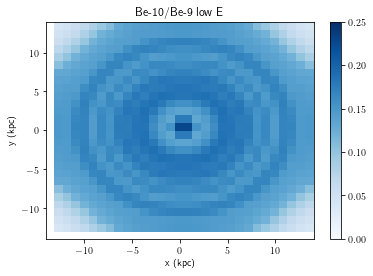

In [44]:
# plotting the 3d full output on xy (plane of galaxy) at z of 0.
#need to make an array thats (x,y,mag) where mag is normalized. 
#plt.imshow((X,Y), cmap='gray')
plt.pcolormesh(X, Y, norms, vmin=0,vmax=0.25,cmap=plt.cm.get_cmap('Blues'))
plt.colorbar()
plt.xlabel("x (kpc)")
plt.ylabel("y (kpc)")
plt.title("Be-10/Be-9 low E")
plt.savefig("proof_of_concept.png")
plt.show()

[-2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7
 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7
  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2. ]
(41, 32)
[       nan 0.05679083 0.05754834 0.05880489 0.06057182 0.06286746
 0.06571713 0.06915343 0.07321642 0.07795404 0.08342247 0.08968656
 0.09681963 0.10490184 0.11401246 0.1242094  0.13548967 0.14774212
 0.16069376 0.17338003 0.18030508 0.17241576 0.15985017 0.14700349
 0.1348376  0.1236301  0.11349518 0.10443775 0.09640128 0.08930751
 0.08307712 0.07763744 0.07292422 0.06888177 0.06546254 0.06262676
 0.06034217 0.05858362 0.05733295 0.05657895        nan]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


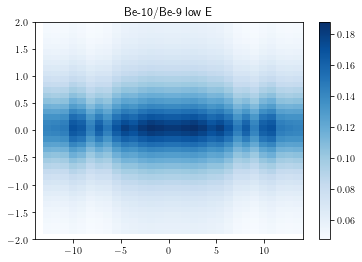

In [35]:
#now for x,z at same energy.
X,Z=np.meshgrid(x_kpc,z_kpc2)
print(z_kpc2)
# now make the normalized flux for a given energy
norms_xz=np.divide(image_data2[16,2,:,10,:],image_data2[15,2,:,10,:])
print(norms_xz.shape)
print(norms_xz[:,10])
plt.pcolormesh(X, Z, norms_xz, cmap=plt.cm.get_cmap('Blues'))
plt.colorbar()
plt.title("Be-10/Be-9 low E")
plt.savefig("proof_of_concept_xz.png")
plt.show()

[-14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.
   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.]
(29, 32)
[       nan 0.5478717  0.5480794  0.5483426  0.5486458  0.54880553
 0.5488756  0.54903316 0.54911613 0.54927385 0.549371   0.5493828
 0.54939973 0.5493927  0.5493865  0.5493927  0.54939973 0.5493828
 0.549371   0.54927385 0.54911613 0.54903316 0.5488756  0.54880553
 0.5486458  0.5483426  0.5480794  0.5478717         nan]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


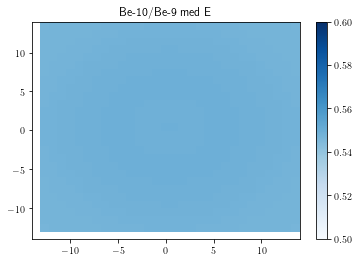

In [41]:
# can i get a map of the normalized flux per particle across the plane of the galaxy?
#first make grid of the galaxy
X,Y=np.meshgrid(x_kpc,y_kpc)
print(y_kpc)
# now make the normalized flux for a given energy
norms=np.divide(image_data2[16,12,20,:,:],image_data2[15,12,20,:,:])
print(norms.shape)
print(norms[:,10])
# plotting the 3d full output on xy (plane of galaxy) at z of 0.
#need to make an array thats (x,y,mag) where mag is normalized. 
#plt.imshow((X,Y), cmap='gray')
plt.pcolormesh(X, Y, norms,vmin=0.5,vmax=0.6, cmap=plt.cm.get_cmap('Blues'))
plt.colorbar()
plt.title("Be-10/Be-9 med E")
plt.savefig("proof_of_concept_med.png")
plt.show()

[-2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7
 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7
  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2. ]
(41, 24)
[       nan 0.5487133  0.54867995 0.5486811  0.54869044 0.5487032
 0.54871774 0.5487333  0.5487495  0.5487662  0.54878324 0.54880047
 0.5488177  0.548835   0.54885197 0.54886866 0.5488847  0.5488997
 0.54891336 0.54892445 0.5489294  0.5489245  0.54891336 0.54889977
 0.5488847  0.5488687  0.548852   0.548835   0.5488178  0.54880047
 0.5487833  0.54876626 0.54874957 0.54873323 0.54871774 0.5487032
 0.54869044 0.5486811  0.5486799  0.5487133         nan]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


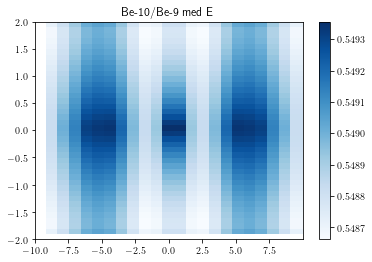

In [55]:
#now for x,z at same energy.
x_kpc=np.arange(-10,10,0.869564347826087)
z_kpc=np.linspace(-2,2,41, endpoint=True)
X,Z=np.meshgrid(x_kpc,z_kpc)
print(z_kpc)
# now make the normalized flux for a given energy
norms_xz=np.divide(image_data5[16,12,:,10,:],image_data5[15,12,:,10,:])
print(norms_xz.shape)
print(norms_xz[:,10])
plt.pcolormesh(X, Z, norms_xz, cmap=plt.cm.get_cmap('Blues'))
plt.colorbar()
plt.title("Be-10/Be-9 med E")
plt.savefig("proof_of_concept_med_xz.png")
plt.show()

[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]
(21, 24)
[       nan 0.5471941  0.5472132  0.54723305 0.5472456  0.5472473
 0.54723704 0.54721737 0.54720515 0.54720354 0.5472039  0.54720354
 0.54720515 0.54721737 0.54723704 0.5472473  0.5472456  0.54723305
 0.5472132  0.5471941         nan]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


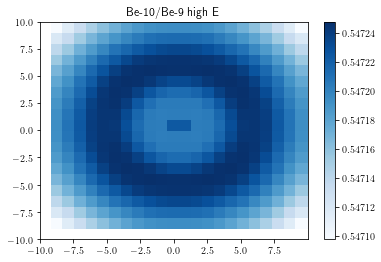

[-2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7
 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7
  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2. ]
(41, 24)
[       nan 0.5480477  0.5475351  0.5473847  0.5473226  0.5472901
 0.5472699  0.5472564  0.54724705 0.5472405  0.5472357  0.54723215
 0.5472293  0.5472269  0.5472248  0.54722285 0.5472211  0.54721946
 0.5472176  0.5472122  0.5472039  0.5472121  0.54721755 0.5472194
 0.54722106 0.54722285 0.5472248  0.54722685 0.5472293  0.54723215
 0.5472357  0.54724044 0.547247   0.54725635 0.5472699  0.5472901
 0.5473225  0.54738456 0.547535   0.5480477         nan]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


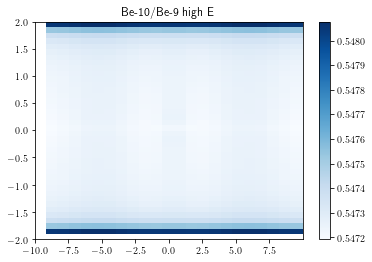

In [56]:
# can i get a map of the normalized flux per particle across the plane of the galaxy?
#first make grid of the galaxy
x_kpc=np.arange(-10,10,0.869564347826087)
y_kpc=np.linspace(-10,10,21, endpoint=True)
X,Y=np.meshgrid(x_kpc,y_kpc)
print(y_kpc)
# now make the normalized flux for a given energy
norms=np.divide(image_data5[16,22,20,:,:],image_data5[15,22,20,:,:])
print(norms.shape)
print(norms[:,10])
# plotting the 3d full output on xy (plane of galaxy) at z of 0.
#need to make an array thats (x,y,mag) where mag is normalized. 
#plt.imshow((X,Y), cmap='gray')
plt.pcolormesh(X, Y, norms, cmap=plt.cm.get_cmap('Blues'))
plt.colorbar()
plt.title("Be-10/Be-9 high E")
plt.savefig("proof_of_concept_high.png")
plt.show()#now for x,z at same energy.
x_kpc=np.arange(-10,10,0.869564347826087)
z_kpc=np.linspace(-2,2,41, endpoint=True)
X,Z=np.meshgrid(x_kpc,z_kpc)
print(z_kpc)
# now make the normalized flux for a given energy
norms_xz=np.divide(image_data5[16,22,:,10,:],image_data5[15,22,:,10,:])
print(norms_xz.shape)
print(norms_xz[:,10])
plt.pcolormesh(X, Z, norms_xz, cmap=plt.cm.get_cmap('Blues'))
plt.colorbar()
plt.title("Be-10/Be-9 high E")
plt.savefig("proof_of_concept_high_xz.png")
plt.show()

In [3]:
#read in the ams data on helium
ams=pd.read_csv('he_3_4_ams_data.csv')
ams.head()
#join low and high together as one array to be used as x error bars
ams_energy=np.array((ams.EK_low.values,ams.Ek_high.values.T))
ams_energy=ams_energy*1000
ams_energy_mp=(ams_energy[0,:]+ams_energy[1,:])/2.0
# now make the error bar sizes (symmetric about these midpoints)
ams_energy_binsize=(ams_energy[1,:]-ams_energy[0,:])/2.0
#make the ratio an array
ams_ratio=np.array(ams._3He_over_4He.values * ams._factor_ratio.values)

In [21]:
ams_ratio_sys_erros=np.array(ams._sys_ratio.values * ams._factor_ratio)
ams_ratio_stat_erros=np.array(ams._stat_ratio.values * ams._factor_ratio)
ams_ratio_errors=np.sqrt(np.square(ams_ratio_stat_erros)+np.square(ams_ratio_sys_erros))
ams_ratio_errors

array([0.00982497, 0.00702567, 0.00712531, 0.00722496, 0.00742428,
       0.00468402, 0.00475395, 0.00494773, 0.00494773, 0.00523927,
       0.00521728, 0.00531507, 0.00531507, 0.00531507, 0.00509902,
       0.00806226, 0.00452769, 0.00452769, 0.00461736, 0.00451774,
       0.00441814, 0.00441814, 0.00462709, 0.0054231 , 0.00841487,
       0.00921358])

In [22]:
ams_energy[1,2]
ams_energy_mp[25]

9455.0

In [23]:
ams.tail()

,EK_low,Ek_high,_3He,_stat_3he,_sys_3he,_factor_3he,_4He,_stat_4he,_sys_4he,factor_4he,_3He_over_4He,_stat_ratio,_sys_ratio,_factor_ratio
21,5.62,6.31,6.298,0.017,0.158,0.1,3.748,0.001,0.079,1,1.680,0.004,0.044,0.1
22,6.31,7.08,4.827,0.013,0.120,0.1,2.932,0.001,0.065,1,1.646,0.005,0.046,0.1
23,7.08,7.94,3.620,0.011,0.090,0.1,2.269,0.001,0.060,1,1.595,0.005,0.054,0.1
24,7.94,8.91,2.669,0.009,0.087,0.1,1.731,0.001,0.059,1,1.542,0.005,0.084,0.1
25,8.91,10.00,1.885,0.007,0.071,0.1,1.284,0.001,0.046,1,1.468,0.005,0.092,0.1


In [24]:
ams_energy

array([[  500.,   560.,   630.,   710.,   790.,   890.,  1000.,  1120.,
         1260.,  1410.,  1580.,  1780.,  2000.,  2240.,  2510.,  2820.,
         3160.,  3550.,  3980.,  4470.,  5010.,  5620.,  6310.,  7080.,
         7940.,  8910.],
       [  560.,   630.,   710.,   790.,   890.,  1000.,  1120.,  1260.,
         1410.,  1580.,  1780.,  2000.,  2240.,  2510.,  2820.,  3160.,
         3550.,  3980.,  4470.,  5010.,  5620.,  6310.,  7080.,  7940.,
         8910., 10000.]])

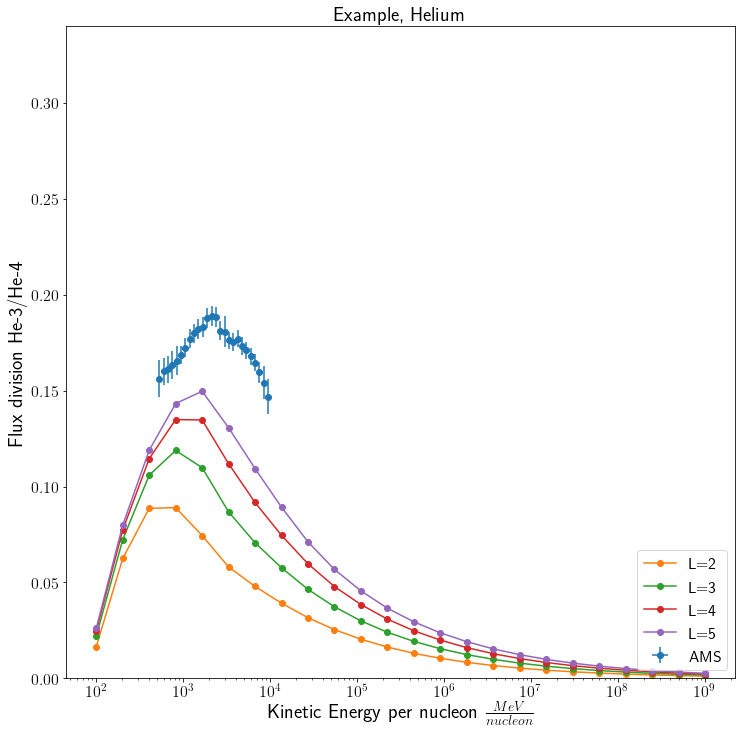

In [25]:
fnt=20
x1=10**2
x2=10**7
y1=0
y2=0.34
plt.figure(figsize=(12,12))
plt.errorbar(ams_energy_mp,ams_ratio,xerr=ams_energy_binsize,yerr=ams_ratio_errors,fmt='o',label="AMS")
plt.plot(energy,he_3_4_2,'-o',label="L=2")
plt.plot(energy,he_3_4_3,'-o',label="L=3")
plt.plot(energy,he_3_4_4,'-o',label="L=4")
plt.plot(energy,he_3_4_5,'-o',label="L=5")
plt.xscale("log")
plt.xlabel("Kinetic Energy per nucleon "r'$\frac{MeV}{nucleon}$',fontsize=fnt)
plt.xticks(fontsize=fnt-4)
#plt.yscale("log")
plt.ylabel("Flux division He-3/He-4",fontsize=fnt)
plt.yticks(fontsize=fnt-4)
#plt.xlim([x1,x2])
plt.ylim([y1,y2])
plt.legend(loc='lower right', fontsize=fnt-4)
plt.title("Example, Helium", fontsize=fnt)
plt.savefig("He_ratio_ams_data.png")
plt.show()